<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/RenzoWalmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#directory of the csv file ( you can change this later if yo ar running on some other device)
dataset_directory = "/home/renzo-rodriguez/Downloads/Walmart_Sales.csv"

In [ ]:
#opening the dataset
data = pd.read_csv(dataset_directory)

In [ ]:
#looking into the shape of the dataset
data.shape

(6435, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   float64
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Day           6435 non-null   float64
 9   Month         6435 non-null   float64
 10  Year          6435 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 553.1+ KB


# intializing weights and other constants
# 8 weights:  holiday, temp, feul_price, CPI, Uneployment
weights = np.random.randn(1,10)

iterations= 100000

J = np.zeros(iterations)

learning_rate = .0000004

data[['Day', 'Month', 'Year']] = data['Date'].str.split('-', expand=True)
data[["Day","Month","Year","Holiday_Flag"]]=data[["Day","Month","Year","Holiday_Flag"]].astype(float)
X = data.drop(['Date',"Weekly_Sales"], axis=1).values
rows, colums = X.shape
X = np.hstack(((np.ones((rows,1))), X))



Y = data["Weekly_Sales"]

Y = np.array(Y).reshape(rows,1)







In [ ]:
weights = np.random.randn(1,10)

iterations= 100000


J = np.zeros(iterations)

learning_rate = .0000004

data[['Day', 'Month', 'Year']] = data['Date'].str.split('-', expand=True)
data[["Day","Month","Year","Holiday_Flag"]]=data[["Day","Month","Year","Holiday_Flag"]].astype(float)
X = data.drop(['Date',"Weekly_Sales"], axis=1).values
rows, colums = X.shape
X = np.hstack(((np.ones((rows,1))), X))

Y = data["Weekly_Sales"]

Y = np.array(Y).reshape(rows,1)

y hat = [-1877.49642456]
y hat = [1177652.37343241]
y hat = [1257899.89320503]
y hat = [1297425.39164583]
y hat = [1316924.48052032]
y hat = [1326245.73588919]
y hat = [1330294.3551144]
y hat = [1331586.64895172]
y hat = [1331436.15994624]
y hat = [1330536.03326944]
 final difference = [[-314435.94830752]
 [-313658.42721098]
 [-293110.15468056]
 ...
 [ -46340.46705536]
 [ -40122.52136901]
 [ -92963.50471887]]


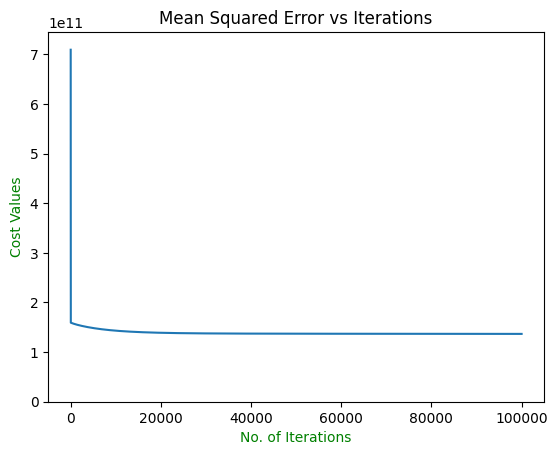

In [ ]:
for iter in range(iterations):
    #print(f'iteration : {iter}')
    #prediction
    y_hat = np.dot(X,weights.T)
    #print(y_hat)
    #calculating error in guess

    difference = y_hat -Y

    if iter % 10000 == 0:
        #print(f'difference at {iter} = {difference}')
        print(f'y hat = {y_hat[0]}')
    #print(f'difference = {difference}')
    sum = np.sum(difference**2)
    #print(sum)

    #print(1/(2*rows)*sum)
    J[iter] = 1/(2 * rows) * sum
    #changing weights to be  better
    weights -= ((learning_rate/rows) * np.dot(difference.reshape(1,rows), X))
print(f' final difference = {difference}')

ax = plt.subplot(111)
ax.plot(np.arange(iterations), J)
ax.set_ylim((0,(max(J)*1.05)))
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()


In [ ]:
def percent_error(X,weights):
    predictions = np.dot(X,weights.T)
    percent = np.mean(np.abs((Y-predictions)/predictions)*100)
    return percent

percent_error(X,weights)


41.42624007301436